In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import cv2
import torch
import numpy as np 
import pandas as pd 
from tensorflow.keras.applications.resnet_v2 import ResNet50V2,preprocess_input
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

In [ ]:
#locate the file path
im_size = 224
train_x = []
train_y= []
val_x = []
val_y= []
dict_label={}
import os 
trainfolder_list = os.listdir("/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/train")
valfolder_list = os.listdir("/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/val")
i=0
for folder in trainfolder_list:
  dict_label[folder] = i
  i+=1



In [ ]:
#read training data
for folder in tqdm(trainfolder_list):
  for filename in os.listdir('/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/train/'+folder):
    img = cv2.resize(cv2.imread('/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/train/'+folder+'/'+filename,cv2.IMREAD_COLOR),((im_size,im_size)))
    img_array = preprocess_input(np.expand_dims(np.array(img[...,::-1].astype(np.float32)).copy(), axis=0))
    train_x.append(img_array.reshape(3,im_size,im_size))
    train_y.append(dict_label[folder])

100%|██████████| 10/10 [02:03<00:00, 12.33s/it]


In [ ]:
#read validation data
for folder in tqdm(valfolder_list):
  for filename in os.listdir('/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/val/'+folder):
    img = cv2.resize(cv2.imread('/content/gdrive/MyDrive/FindCareer/FellowshipAI/imagewoof-320/val/'+folder+'/'+filename,cv2.IMREAD_COLOR),((im_size,im_size)))
    img_array = preprocess_input(np.expand_dims(np.array(img[...,::-1].astype(np.float32)).copy(), axis=0))
    val_x.append(img_array.reshape(3,im_size,im_size))
    val_y.append(dict_label[folder])

100%|██████████| 10/10 [00:03<00:00,  2.93it/s]


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


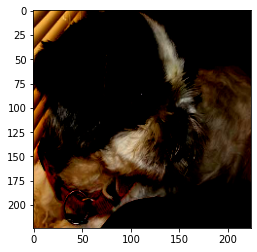

8
{'n02089973': 0, 'n02115641': 1, 'n02111889': 2, 'n02093754': 3, 'n02099601': 4, 'n02105641': 5, 'n02096294': 6, 'n02087394': 7, 'n02086240': 8, 'n02088364': 9}
images-size: (3, 224, 224)
9971
500
2493
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [ ]:
#just checking the data
plt.imshow(train_x[150].reshape(224,224,3))
plt.show()
print(train_y[150])
print(dict_label)

print("images-size:", train_x[0].shape)
print(len(train_y))
print(len(val_y))
print(len(test_y))
print(val_y)

In [ ]:
from torch.utils.data import Dataset, DataLoader, ConcatDataset
batchSize = 32
dataset=list(zip(train_x, train_y))
trainloader = DataLoader(dataset, batch_size = batchSize, shuffle=True)

In [ ]:
validataset=list(zip(val_x, val_y))
valiloader = DataLoader(validataset, batch_size = batchSize, shuffle=True)

In [ ]:
testset=list(zip(test_x, test_y))
testloader = DataLoader(testset, batch_size = batchSize, shuffle=True)

In [ ]:
from torchvision import *
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = models.resnet18(pretrained=True)
net = net.cuda() if device else net
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch.nn as nn
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

def accuracy(out, labels):
  _,pred = torch.max(out, dim=1)
  return torch.sum(pred==labels).item()
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 128)
net.fc = net.fc.cuda() if torch.cuda.is_available() else net.fc

In [ ]:
n_epochs = 200
print_every = 10
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
total_step = len(trainloader)
for epoch in range(1, n_epochs+1):
  running_loss = 0.0
  correct = 0
  total=0
  print(f'Epoch {epoch}\n')
  for batch_idx, (data_, target_) in enumerate(trainloader):
    data_, target_ = data_.to(device), target_.to(device)
    optimizer.zero_grad()
    outputs = net(data_)
    loss = criterion(outputs, target_)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    _,pred = torch.max(outputs, dim=1)
    correct += torch.sum(pred==target_).item()
    total += target_.size(0)
    if (batch_idx) % 20 == 0:
      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
              .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
  train_acc.append(100 * correct / total)
  train_loss.append(running_loss/total_step)
  print(f'\ntrain-loss: {np.mean(train_loss):.4f}, train-acc: {(100 * correct/total):.4f}')
  batch_loss = 0
  total_t=0
  correct_t=0
  with torch.no_grad():
    net.eval()
    for data_t, target_t in (testloader):
      data_t, target_t = data_t.to(device), target_t.to(device)
      outputs_t = net(data_t)
      loss_t = criterion(outputs_t, target_t)
      batch_loss += loss_t.item()
      _,pred_t = torch.max(outputs_t, dim=1)
      correct_t += torch.sum(pred_t==target_t).item()
      total_t += target_t.size(0)
    val_acc.append(100 * correct_t/total_t)
    val_loss.append(batch_loss/len(testloader))
    network_learned = batch_loss < valid_loss_min
    print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')

    if network_learned:
      valid_loss_min = batch_loss
      torch.save(net.state_dict(), 'resnet.pt')
      print('Improvement-Detected, save-model')


  net.train()

Epoch 1

Epoch [1/200], Step [0/312], Loss: 5.2945
Epoch [1/200], Step [20/312], Loss: 5.2177
Epoch [1/200], Step [40/312], Loss: 5.0701
Epoch [1/200], Step [60/312], Loss: 5.1168
Epoch [1/200], Step [80/312], Loss: 5.1485
Epoch [1/200], Step [100/312], Loss: 5.1567
Epoch [1/200], Step [120/312], Loss: 5.0575
Epoch [1/200], Step [140/312], Loss: 5.1182
Epoch [1/200], Step [160/312], Loss: 5.3125
Epoch [1/200], Step [180/312], Loss: 5.0191
Epoch [1/200], Step [200/312], Loss: 5.1787
Epoch [1/200], Step [220/312], Loss: 5.0047
Epoch [1/200], Step [240/312], Loss: 5.0725
Epoch [1/200], Step [260/312], Loss: 5.0997
Epoch [1/200], Step [280/312], Loss: 5.2080
Epoch [1/200], Step [300/312], Loss: 4.9834

train-loss: 5.1032, train-acc: 0.2206
validation loss: 5.0082, validation acc: 0.4813

Improvement-Detected, save-model
Epoch 2

Epoch [2/200], Step [0/312], Loss: 5.0730
Epoch [2/200], Step [20/312], Loss: 4.8301
Epoch [2/200], Step [40/312], Loss: 4.8943
Epoch [2/200], Step [60/312], Loss:

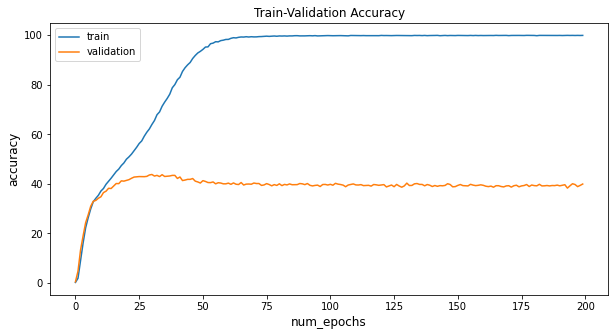

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.title("Train-Validation Accuracy")
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')

In [ ]:
correct = 0
total = 0
pred_list=[]
true_list=[]
# since we're not training, we don't need to calculate the gradients for our outputs
net.eval()
with torch.no_grad():
  for data in valiloader:
    images, labels = data
    images, labels = images.cuda(), labels.cuda()
    # calculate outputs by running images through the network
    outputs = net(images)
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    pred_list.append(predicted.cpu().numpy())
    true_list.append(labels.cpu().numpy())


print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 34 %


In [ ]:
pred_list=list(np.concatenate(pred_list).flat)
true_list=list(np.concatenate(true_list).flat)
print(pred_list)
print(true_list)

[6, 8, 1, 9, 8, 4, 3, 0, 5, 2, 2, 1, 3, 7, 4, 8, 9, 7, 9, 2, 7, 7, 2, 4, 5, 1, 6, 3, 8, 9, 9, 7, 0, 4, 1, 1, 6, 8, 4, 1, 2, 7, 3, 9, 5, 8, 5, 8, 7, 3, 9, 6, 5, 2, 1, 9, 5, 9, 2, 8, 7, 0, 9, 4, 2, 2, 3, 6, 6, 4, 5, 5, 4, 3, 9, 4, 5, 6, 3, 1, 3, 3, 2, 8, 1, 2, 2, 8, 8, 6, 3, 7, 7, 9, 6, 9, 1, 1, 4, 5, 2, 5, 9, 1, 4, 6, 0, 6, 8, 6, 3, 2, 3, 6, 8, 7, 6, 4, 9, 1, 0, 3, 8, 6, 7, 3, 9, 9, 0, 4, 6, 8, 1, 0, 5, 5, 8, 7, 3, 7, 2, 3, 6, 8, 1, 9, 2, 4, 9, 3, 4, 2, 8, 1, 7, 0, 7, 3, 9, 6, 2, 9, 8, 2, 1, 6, 7, 1, 1, 6, 3, 3, 4, 3, 5, 9, 6, 5, 3, 7, 2, 6, 4, 7, 8, 6, 9, 2, 9, 4, 7, 1, 6, 3, 2, 1, 5, 5, 0, 6, 8, 6, 2, 7, 5, 9, 6, 9, 7, 6, 7, 2, 9, 1, 1, 8, 8, 5, 7, 4, 4, 7, 3, 1, 9, 3, 4, 2, 9, 5, 6, 9, 9, 6, 9, 6, 7, 6, 2, 8, 4, 1, 2, 7, 9, 8, 5, 9, 1, 3, 2, 4, 7, 2, 7, 3, 2, 8, 7, 7, 8, 0, 9, 1, 3, 9, 0, 0, 9, 2, 6, 7, 4, 7, 3, 9, 5, 9, 4, 8, 4, 2, 4, 6, 4, 9, 5, 5, 7, 0, 6, 9, 4, 8, 9, 2, 0, 7, 1, 1, 2, 6, 2, 4, 5, 7, 1, 7, 8, 4, 1, 7, 8, 8, 3, 9, 1, 6, 2, 8, 6, 4, 2, 8, 4, 1, 9, 5, 6, 8, 5, 1, 7, 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
array=confusion_matrix(true_list, pred_list)
print(array)

[[ 7  7  1  3  4  3  3  7  5 10]
 [ 2 15  3  4  9  0  3  8  1  5]
 [ 1  0 32  1  3  4  1  1  5  2]
 [ 1  1  2 14  3  3 11  8  2  5]
 [ 2  5  2  5 11  4  9  4  1  7]
 [ 1  2  6  4  3 16  1  3  8  6]
 [ 3  3  2  4  4  2 18  6  5  3]
 [ 0  8  1  3  7  0  5 20  1  5]
 [ 1  1  4  7  4  7  2  0 21  3]
 [ 7  5  4  5  2  2  3  1  3 18]]


In [ ]:
#dummy classifier
from sklearn.dummy import DummyClassifier
X = true_list
y = true_list
dummy_clf = DummyClassifier(strategy="most_frequent")  #or most_frequent,stratified
dummy_clf.fit(X, y)
print("dummy classifier result\n")
#print(dummy_clf.score(X, y))
x_dummy=dummy_clf.predict(X)
print(classification_report(true_list, x_dummy))

dummy classifier result

              precision    recall  f1-score   support

           0       0.10      1.00      0.18        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        50
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00        50

    accuracy                           0.10       500
   macro avg       0.01      0.10      0.02       500
weighted avg       0.01      0.10      0.02       500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


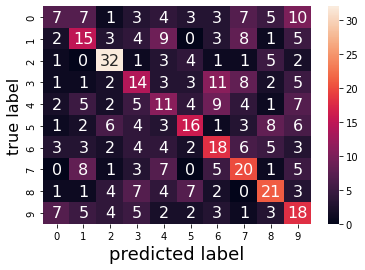



classification report:

              precision    recall  f1-score   support

           0       0.28      0.14      0.19        50
           1       0.32      0.30      0.31        50
           2       0.56      0.64      0.60        50
           3       0.28      0.28      0.28        50
           4       0.22      0.22      0.22        50
           5       0.39      0.32      0.35        50
           6       0.32      0.36      0.34        50
           7       0.34      0.40      0.37        50
           8       0.40      0.42      0.41        50
           9       0.28      0.36      0.32        50

    accuracy                           0.34       500
   macro avg       0.34      0.34      0.34       500
weighted avg       0.34      0.34      0.34       500



In [ ]:
#plot the confusion_matrix, and classification_report
import seaborn as sn
df_cm = pd.DataFrame(array, range(10), range(10))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
plt.xlabel('predicted label', fontsize=18)
plt.ylabel('true label', fontsize=16)
plt.show()
print("\n\nclassification report:\n\n"+classification_report(true_list, pred_list))